In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EastWestAirlines.csv")

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


<AxesSubplot:>

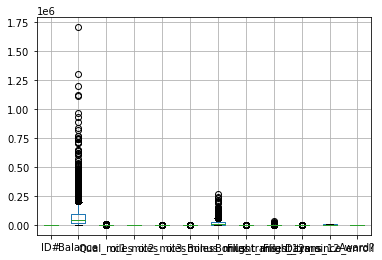

In [5]:
df.boxplot()

array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>]], dtype=object)

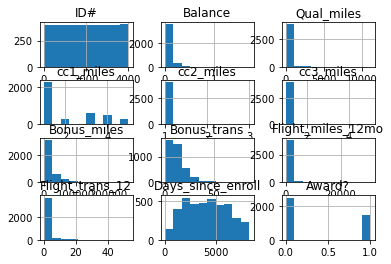

In [6]:
df.hist()

In [7]:
df.drop(['Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'],axis=1,inplace=True)

In [8]:
df.head()


,ID#,Balance,Bonus_miles,Days_since_enroll
0,1,28143,174,7000
1,2,19244,215,6968
2,3,41354,4123,7034
3,4,14776,500,6952
4,5,97752,43300,6935


In [9]:
array=df.values
array

array([[    1, 28143,   174,  7000],
       [    2, 19244,   215,  6968],
       [    3, 41354,  4123,  7034],
       ...,
       [ 4019, 73597, 25447,  1402],
       [ 4020, 54899,   500,  1401],
       [ 4021,  3016,     0,  1398]], dtype=int64)

In [10]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -7.02786266e-01,
         1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -7.01088399e-01,
         1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -5.39252702e-01,
         1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05,  3.43803696e-01,
        -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -6.89286154e-01,
        -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -7.09991847e-01,
        -1.31754109e+00]])

In [11]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [12]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [14]:
pd.concat([df,cl],axis=1)

,ID#,Balance,Bonus_miles,Days_since_enroll,cluster
0,1,28143,174,7000,0
1,2,19244,215,6968,0
2,3,41354,4123,7034,0
3,4,14776,500,6952,0
4,5,97752,43300,6935,0
...,...,...,...,...,...
3994,4017,18476,8525,1403,0
3995,4018,64385,981,1395,0
3996,4019,73597,25447,1402,0
3997,4020,54899,500,1401,0
